# TP3 Régression logistique et algorithme de descente de gradient stochastique


### Table of Contents

* [1. Régression logistique de Sklearn](#chapter1)
* [2. La descente de gradient pour la régression logistique](#chapter2)
* [3. La descente de gradient stochastique / mini-batch](#chapter3)



## 0. Préparation des données

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Les données qu'on va classifier sont `X, y` générées par le programme suivant, où  `X` indique les features en dimension 2 et `y` indique le label à valeur dans {0,1}. 

In [3]:
np.random.seed(12)
demi_num_observations=5000

x1=np.random.multivariate_normal([0,0],[[1,0.75],[0.75,1]], demi_num_observations)
x2=np.random.multivariate_normal([1,4],[[1,0.75],[0.75,1]], demi_num_observations)


In [4]:
X= np.vstack((x1, x2)).astype(np.float32)
y=np.hstack((np.zeros(demi_num_observations),np.ones(demi_num_observations)))


**Exercice 1** : Quelles sont les dimensions de `X` et de `y` ?

In [5]:
# Réponse pour l'exercice 1
print("La dimension de X est : ", X.shape)
print("La dimension de y est : ", y.shape)




La dimension de X est :  (10000, 2)
La dimension de y est :  (10000,)


Maintenant on va montrer l'image des données. 

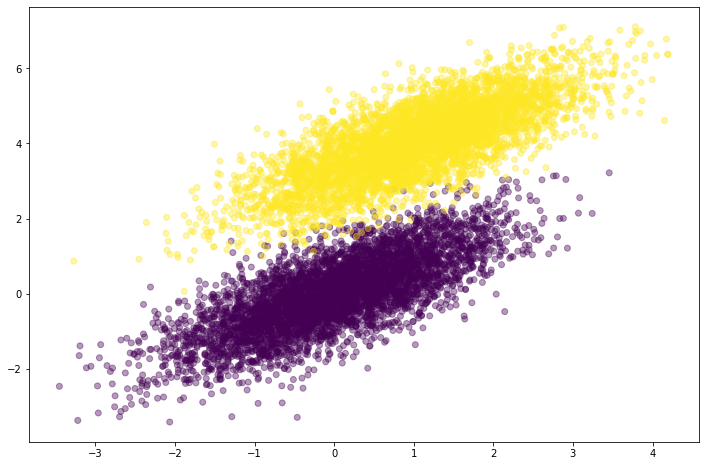

In [6]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,0], X[:,1],c=y,alpha=0.4)

**Exercice 2** : À quoi sert `c=y` ? Essayer le code suivant sans `c=y`, que remarquez-vous?


*Référence* : Lire la déscription du paramètre `c` de cette page :
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

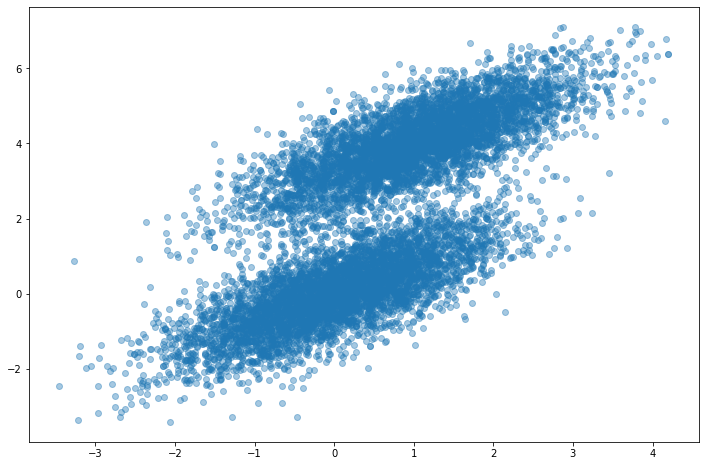

In [7]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,0], X[:,1],alpha=0.4)

Réponse pour l'exercice 2 : le c=y sert à faire apparaitre une couleur selon y






_____________

## 1. Régression logistique de Sklearn<a class="anchor" id="chapter1"></a> 

Maintenant on va créer et entraîner un modèle de régression logistique en utilisant `Sklearn`. 

*Référence* :

- Package de `LogisticRegression` de `sklearn.linear_model` : 
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html 

- La fonction de coût de régression logistique de Sklearn : Section 1.1.11 de cette page 
https://scikit-learn.org/dev/modules/linear_model.html#logistic-regression (Pour la partie de pénalité $\frac{1}{2}w^{\top}w$, on peut ignorer pour l'instant et on va voir la régularisation dans la dernière section du Chapitre 3.)


**Exercice 3** : Créer un modèle de régression logistique, nommé  `Reglog`, avec paramètres  `fit_intercept=True` et `C=1e15`. 

- Que signifie `fit_intercept=True`?

- `C` est un paramètre pour la régularisation qu'on va voir dans la dernière section du Chapitre 3. Pour l'instant on va juste choisir un nombre assez grand (e.g. `C=1e15`) pour que l'effet de la régularisation soit léger.

In [8]:
# Réponse pour l'exercice 3
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
Reglog = LogisticRegression(fit_intercept=True, C=1e15)




**Exercice 4** : Entraîner le modèle `Reglog` sur les données `(X,y)`. 

In [9]:
# Réponse pour l'exercice 4
Reglog = Reglog.fit(X,y)




**Exercice 5** : (1) `print` les coefficients et l'ordonnée à l'origine (intercept) de la frontière de décision de la régression logistique.

- Frontière de décision $\leftrightarrow$ decision boundary

- *Indication* : Lire les `Attributes` d'un modèle de régression logistique de cette page : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

(2) Et tracer la frontière de décision sur l'image des données entre -4 et 4. Que constate-t-on ?

- *Indication* : Comment interpréter les coefficients et l'intercept ?  

Les coefficients obtenus sont :  [[-5.05902155  8.28959202]]
L'intercept vaut :  [-14.09231079]


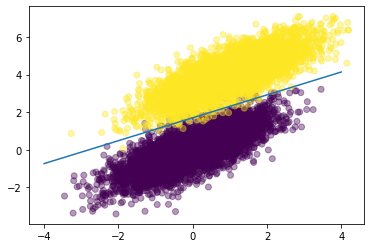

In [10]:
# Réponse pour l'exercice 5
print("Les coefficients obtenus sont : ", Reglog.coef_)
print("L'intercept vaut : ", Reglog.intercept_)

Beta = Reglog.coef_[0]
b = Reglog.intercept_
x1 = np.linspace(-4,4)
plt.scatter(X[:,0],X[:,1], c=y, alpha=0.4)
plt.plot(x1, (-b -x1*Beta[0])/Beta[1])

_____________

## 2.  La descente de gradient pour la régression logistique<a class="anchor" id="chapter2"></a> 

Maintenant on va écrire l'algorithme de la descente de gradient pour la fonction de coût de régression logistique. 


**Exercice 6** : Écrire la fonction sigmoide, nommée `sigmoid` et tracer la courbe de `sigmoid` entre $[-7,7]$. 

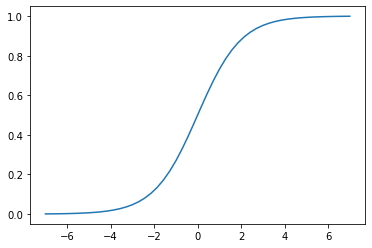

In [11]:
# Réponse pour l'exercice 6

def sigmoid(x):
    return 1/(1+np.exp(-x))

#remplir votre code ici pour tracer la courbe
x3=np.linspace(-7, 7)
plt.plot(x3, sigmoid(x3))

**Exercice 7** : On note $w$ le vecteur de poids et $b$ l'ordonnée à l'origine (intercept). 

(1) Rappeler l'idée de la régression logistique. Rappeler la formule de log-vraisemblance de la régression logistique sur un ensemble des données $\mathcal{D}_n=\{(X_i, Y_i),\; 1\leq i\leq n\}$. 

(2) Écrire la fonction de coût de la régression logistique définie par - log-vraisemblance sur les données `(X,y)` définies ci-dessus, nommé `cost_log_likelihood`. 

Réponse pour l'exercice 7 - (1) :






In [12]:
# Réponse pour l'exercice 7
# Indication : pour chercher les i t.q. Y_i = 0 ou t.q. Y_i = 1, 
#              on peut utiliser np.where(y==0) et np.where(y==1) 
#              un exemple de np.where () se trouve dans la prochaine cellule 


def cost_log_likelihood(X, y, w, b):
    
    #remplir votre code ici
    cost = 0
    for i in range(len(y)):
        cost = cost - (y[i]*np.log(sigmoid(X[i,0]*w[0] + X[i,1]*w[1] + b)) +(1-y[i])*np.log(1-sigmoid(X[i,0]*w[0] + X[i,1]*w[1] + b)))
    return cost

In [13]:
# Un exemple de np.where() 

a=np.array([0,0,1,1,0,1,1,1,0])
print (np.where(a==0))
print (np.where(a==1))

(array([0, 1, 4, 8]),)
(array([2, 3, 5, 6, 7]),)


**Exercice 8** : Écrire une fonction pour l'algorithme de descente de gradient pour la fonction de coût de la régression logistique. 

- On nomme cette fonction `GD_logistic_reg`. `GD` pour `Gradient Descent`.

- Les entrées de cette fonction seront 

  - les données `X,y`, 
       
  - le nombre total d'itération de la descente de gradient (num_steps)    
  - le taux d'apprentissage (learning_rate)

- On prend les initialisations des paramètres $w=(0,0)$ et $b=0$.


In [14]:
# Réponse pour l'exercice 8 : 

def GD_logistic_reg(X,y, num_steps, learning_rate):
    
    w,b = np.array([0,0]), 0 #remplir votre code ici, pour l'initialisation des parametres w et b
    
    for step in range(num_steps):
  
        grad_w= np.array([sum(X[:,0] * (y - sigmoid(X[:,0]*w[0]+X[:,1]*w[1] + b))), sum(X[:,1] * (y - sigmoid(X[:,0]*w[0]+X[:,1]*w[1] + b)))]) #remplir votre code ici, pour le gradient sur w (voir TD2-EX2)        
        grad_b= sum(y - sigmoid(X[:,0]*w[0]+X[:,1]*w[1] + b))#remplir votre code ici, pour le gradient sur b (voir TD2-EX2)
    
        #remplir votre code ici pour itération de GD pour w
        w = np.array([w[0] - learning_rate*grad_w[0], w[1] - learning_rate*grad_w[1]])
        b = b - learning_rate * grad_b
        #remplir votre code ici pour itération de GD pour b

        #Question: Que signifient les deux prochaines lignes ? 
        #          Sont-elles obligatoires ?
        if step%10000==0:
            print (cost_log_likelihood(X,y,w,b))

    return w,b

**Exercice 9** : Exécuter la prochaine cellule. Comparer le coefficients qu'on obtient par la descente de gradient avec le résultat de Sklearn. Et tracer la frontière de décision sur l'image des données entre -4 et 4.

In [15]:
w_GD,b_GD=GD_logistic_reg(X, y, num_steps=100000, learning_rate=5e-5)


print ("Les paramètres de la régression logistique par GD sont : ", w_GD,b_GD)

/var/folders/z1/x1_5kkp14nz74hltqkr5dzn00000gn/T/ipykernel_19492/2803171297.py:4: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


Les paramètres de la régression logistique par GD sont :  [ -33271.30979508 -109896.38135799] -13739.858455244397


**Exercice 10** : (optionnel) 
On prend toujours les initialisations des paramètres $w=(0,0)$ et $b=0$. Et on va faire l'algorithme de la descente de gradient pour 200 pas au total avec `learning_rate=5e-5` . 

Tracer la fontière de décision à chaque 20 pas d'itération et constater le changement de la fontière de décision au long de la descente de gradient. 

- Indication : On peut s'inspirer de la fonction `GD_logistic_reg`.


In [ ]:
# Réponse pour l'exercice 10 : 








------------------------------

## 3. La descente de gradient stochastique / mini-batch pour la régression logistique<a class="anchor" id="chapter3"></a> 

**Exercice 11** : Écrire une fonction pour l'algorithme de descente de gradient stochastique /mini-batch pour la fonction de coût de la régression logistique. 

- On nomme cette fonction `SGD_logistic_reg`. `SGD` pour `Stochastic Gradient Descent`.

- Les entrées de cette fonction seront 

  - les données `X,y`, 
       
  - le nombre total d'itération de la descente de gradient stochastique (num_steps)    

  - le taux d'apprentissage (learning_rate)
    
  - la taille de mini-batch (batch_size)

- On prend les initialisations des paramètres $w=(0,0)$ et $b=0$.

In [ ]:
# Réponse pour l'exercice 11 : 

def SGD_logistic_reg(X, y, num_steps, learning_rate, batch_size):
    
    w, b = #remplir votre code ici, pour l'initialisation des parametres w et b
    
    for step in range(num_steps):
        
        # Étape 1 : échantillonner un mini-batch à partir des données.
        # Indication :  on peut utiliser np.random.choice() par exemple
        # Un exemple de np.random.choice() est dans la cellule prochaine
        # Attention: on a besoin d'échantillonner non seulement X mais aussi y.
        # remplir votre code ici
        
        
        #Étape 2 : calculer le gradient de w et de b 
        # (pour la somme des échantillons dans le mini-batch)
        grad_w = 
        grad_b = 
        
        #remplir votre code ici pour itération de GD pour w
        #remplir votre code ici pour itération de GD pour b

        if step % 10000 == 0:
            print (cost_log_likelihood(X, y, w, b))
    return w,b





In [20]:
# Un exemple de np.random.choice()

i=np.array([0,1,2,3,4,5,6,7,8,9,10])
batch_size=3

print (np.random.choice(i, batch_size))

batch_num = np.random.choice(i, batch_size)

print (X[batch_num])
print (y[batch_num])

[ 9  4 10]
[[-0.26047906  1.770204  ]
 [ 0.37451947 -0.8280822 ]
 [ 0.03771096 -0.04730284]]
[0. 0. 0.]


**Exercice 12** : Exécuter la prochaine cellule. Comparer les coefficients qu'on obtient par la descente de gradient stochastique avec le résultat de Sklearn et le résultat obtenu par la descente de gradient. 

- Remarque : Le nombre d'échantillons dans $\mathcal{D}_n$ est 10000. Mais ici on choisit la taille de mini-batch = 1000. $\Rightarrow$ À chaque itération de gradient descent, on ne fait que 10% de calcul par rapport à la descente de gradient classique. 

- On peut augmenter `learning_rate` à `5e-4` afin d'avoir une convergence plus rapide

In [ ]:
w_SGD, b_SGD = SGD_logistic_reg(X, y, num_steps = 100000, 
                                learning_rate = 5e-4, batch_size=1000)

print ("les paramètres calculés par la descente de gradient stochastique sont : ", w_SGD, b_SGD)
